In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# 1. Input & Output (BMI)

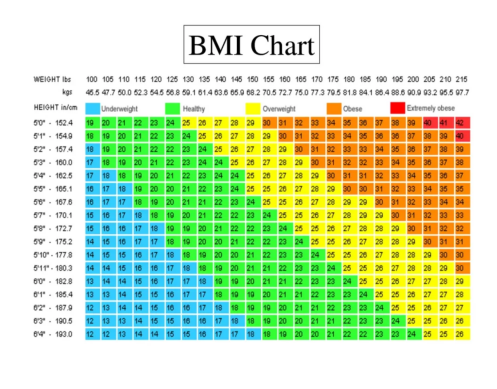

In [2]:
# show image from local file
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('./assets/healthy-bmi.webp')
# Display the image without axis
plt.axis('off')
plt.imshow(img)

Berdasarkan chart BMI tersebut, kategori BMI secara umum dapat ditentukan sebagai 
- Underweight: BMI < 18.5 
- Healthy (Normal): 18.5 <= BMI < 25 
- Overweight: 25 <= BMI < 30
- Obese: BMI > 30

Dengan data tersebut, kita dapat mendesain membership function berbasis linear seperti berikut:

| Kategori    | Tipe      | Titik-titik         |
| ----------- | --------- | ------------------- |
| Underweight | Trapezoid | \[10, 10, 17, 18.5] |
| Healthy     | Trapezoid | \[18, 19, 24, 25]   |
| Overweight  | Trapezoid | \[24.5, 26, 29, 30] |
| Obese       | Trapezoid | \[29.5, 31, 40] |



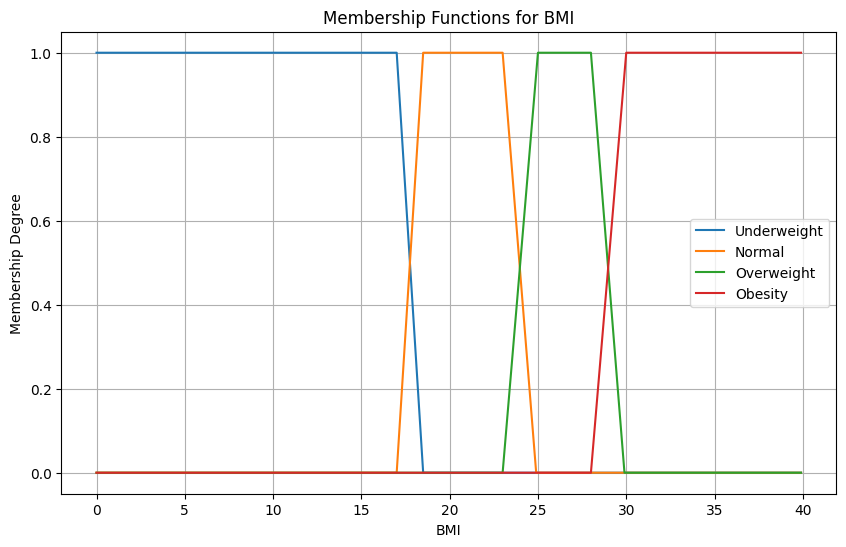

In [3]:
x_bmi = np.arange(0, 40, 0.1)

underweight = fuzz.trapmf(x_bmi, [0, 0, 17, 18.5])
normal_weight = fuzz.trapmf(x_bmi, [17, 18.5, 23, 24.9])
overweight = fuzz.trapmf(x_bmi, [23, 25, 28, 29.9])
obesity = fuzz.trapmf(x_bmi, [28, 30, 40, 40])

plt.figure(figsize=(10, 6))
plt.plot(x_bmi, underweight, label='Underweight')
plt.plot(x_bmi, normal_weight, label='Normal')
plt.plot(x_bmi, overweight, label='Overweight')
plt.plot(x_bmi, obesity, label='Obesity')

plt.title('Membership Functions for BMI')
plt.xlabel('BMI')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# 1. Input & Output (BodyFat - Women)

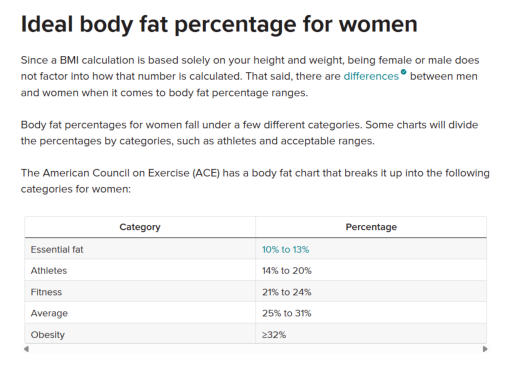

In [4]:
img = mpimg.imread('./assets/bf-women.png')
# Display the image without axis
plt.axis('off')
plt.imshow(img)

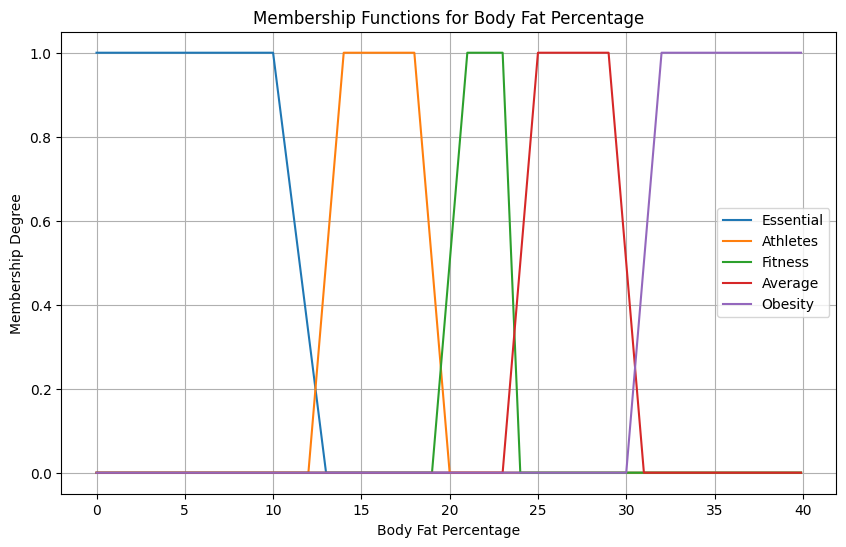

In [5]:
x_bodyfat = np.arange(0, 40, 0.1)

essential_fat = fuzz.trapmf(x_bodyfat, [0, 0, 10, 13])
athletes = fuzz.trapmf(x_bodyfat, [12, 14, 18, 20])
fitness = fuzz.trapmf(x_bodyfat, [19, 21, 23, 24])
average = fuzz.trapmf(x_bodyfat, [23, 25, 29, 31])
obesity = fuzz.trapmf(x_bodyfat, [30, 32, 40, 40])

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x_bodyfat, essential_fat, label='Essential')
plt.plot(x_bodyfat, athletes, label='Athletes')
plt.plot(x_bodyfat, fitness, label='Fitness')
plt.plot(x_bodyfat, average, label='Average')
plt.plot(x_bodyfat, obesity, label='Obesity')

plt.title('Membership Functions for Body Fat Percentage')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# 1. Input & Output (BodyFat - Men)

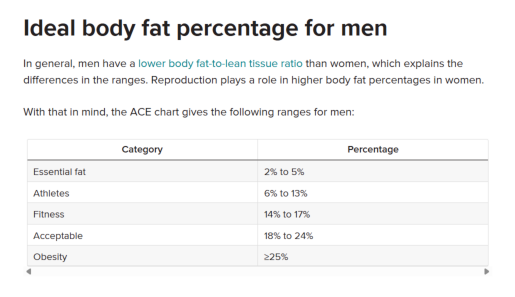

In [6]:
img = mpimg.imread('./assets/bf-men.png')
# Display the image without axis
plt.axis('off')
plt.imshow(img)

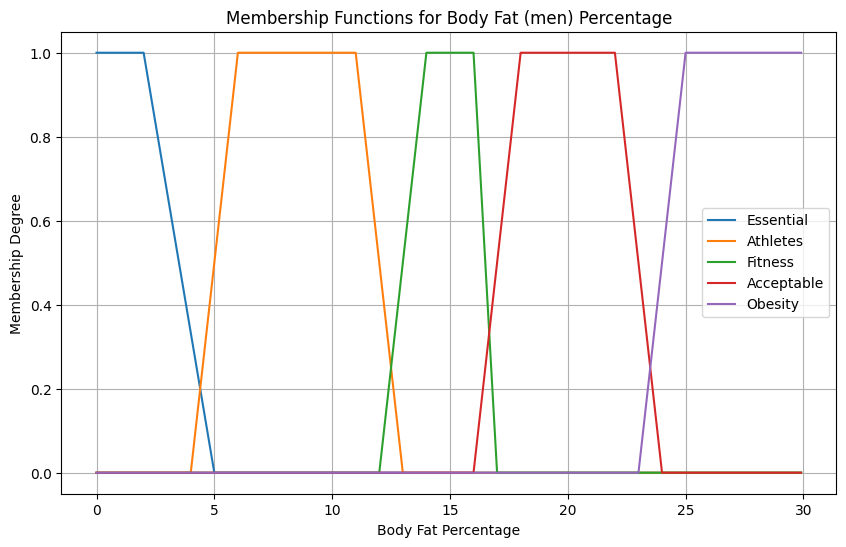

In [7]:
x_bodyfat = np.arange(0, 30, 0.1)

essential_fat = fuzz.trapmf(x_bodyfat, [0, 0, 2, 5])
athletes = fuzz.trapmf(x_bodyfat, [4, 6, 11, 13])
fitness = fuzz.trapmf(x_bodyfat, [12, 14, 16, 17])
acceptable = fuzz.trapmf(x_bodyfat, [16, 18, 22, 24])
obesity = fuzz.trapmf(x_bodyfat, [23, 25, 30, 30])

plt.figure(figsize=(10, 6))
plt.plot(x_bodyfat, essential_fat, label='Essential')
plt.plot(x_bodyfat, athletes, label='Athletes')
plt.plot(x_bodyfat, fitness, label='Fitness')
plt.plot(x_bodyfat, acceptable, label='Acceptable')
plt.plot(x_bodyfat, obesity, label='Obesity')

plt.title('Membership Functions for Body Fat (men) Percentage')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# 2. Fuzzy Rules Protein (women)

In [9]:
from skfuzzy import control as ctrl

In [14]:
bmi = ctrl.Antecedent(np.arange(0, 40, 0.1), 'bmi')
bodyfat = ctrl.Antecedent(np.arange(0, 40, 0.1), 'bodyfat')
protein = ctrl.Consequent(np.arange(20, 200, 1), 'protein')

In [17]:
bmi['underweight'] = fuzz.trapmf(bmi.universe, [0, 0, 17, 18.5])
bmi['normal'] = fuzz.trapmf(bmi.universe, [17, 18.5, 23, 24.9])
bmi['overweight'] = fuzz.trapmf(bmi.universe, [23, 25, 28, 29.9])
bmi['obese'] = fuzz.trapmf(bmi.universe, [28, 30, 40, 40])

In [18]:
bodyfat['essential'] = fuzz.trapmf(bodyfat.universe, [0, 0, 10, 13])
bodyfat['athletes'] = fuzz.trapmf(bodyfat.universe, [12, 14, 18, 20])
bodyfat['fitness'] = fuzz.trapmf(bodyfat.universe, [19, 21, 23, 24])
bodyfat['average'] = fuzz.trapmf(bodyfat.universe, [23, 25, 29, 31])
bodyfat['obese'] = fuzz.trapmf(bodyfat.universe, [30, 32, 40, 40])

In [19]:
# output linguistic variables
protein['very_low'] = fuzz.trimf(protein.universe, [20, 30, 40])
protein['low'] = fuzz.trimf(protein.universe, [40, 55, 70])
protein['medium'] = fuzz.trimf(protein.universe, [70, 90, 110])
protein['high'] = fuzz.trimf(protein.universe, [110, 130, 150])
protein['very_high'] = fuzz.trimf(protein.universe, [150, 170, 190])

In [22]:
# fuzzy rules
rule1 = ctrl.Rule(bmi['underweight'] & bodyfat['essential'], protein['high'])
rule2 = ctrl.Rule(bmi['underweight'] & bodyfat['athletes'], protein['high'])
rule3 = ctrl.Rule(bmi['underweight'] & bodyfat['fitness'], protein['medium'])
rule4 = ctrl.Rule(bmi['underweight'] & bodyfat['average'], protein['medium'])
rule5 = ctrl.Rule(bmi['underweight'] & bodyfat['obese'], protein['medium'])

rule6 = ctrl.Rule(bmi['normal'] & bodyfat['essential'], protein['high'])
rule7 = ctrl.Rule(bmi['normal'] & bodyfat['athletes'], protein['very_high'])
rule8 = ctrl.Rule(bmi['normal'] & bodyfat['fitness'], protein['high'])
rule9 = ctrl.Rule(bmi['normal'] & bodyfat['average'], protein['medium'])
rule10 = ctrl.Rule(bmi['normal'] & bodyfat['obese'], protein['medium'])

rule11 = ctrl.Rule(bmi['overweight'] & bodyfat['essential'], protein['medium'])
rule12 = ctrl.Rule(bmi['overweight'] & bodyfat['athletes'], protein['high'])
rule13 = ctrl.Rule(bmi['overweight'] & bodyfat['fitness'], protein['medium'])
rule14 = ctrl.Rule(bmi['overweight'] & bodyfat['average'], protein['medium'])
rule15 = ctrl.Rule(bmi['overweight'] & bodyfat['obese'], protein['medium'])

rule16 = ctrl.Rule(bmi['obese'] & bodyfat['essential'], protein['medium'])
rule17 = ctrl.Rule(bmi['obese'] & bodyfat['athletes'], protein['medium'])
rule18 = ctrl.Rule(bmi['obese'] & bodyfat['fitness'], protein['medium'])
rule19 = ctrl.Rule(bmi['obese'] & bodyfat['average'], protein['medium'])
rule20 = ctrl.Rule(bmi['obese'] & bodyfat['obese'], protein['medium'])

In [23]:
protein_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15,
    rule16, rule17, rule18, rule19, rule20
])

protein_simulator = ctrl.ControlSystemSimulation(protein_ctrl)

Recommended protein intake: 170.00 grams/day


c:\Users\HP\Documents\college\semester-4\CAK2HAB3-dasar-kecerdasan-artifisial\project\fuzzy-system\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


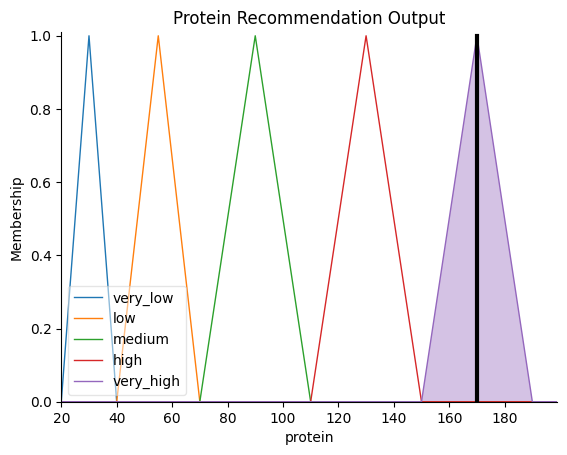

In [25]:
protein_simulator.input['bmi'] = 23
protein_simulator.input['bodyfat'] = 18
protein_simulator.compute()

print(f"Recommended protein intake: {protein_simulator.output['protein']:.2f} grams/day")

# Visualisasi output
protein.view(sim=protein_simulator)
plt.title('Protein Recommendation Output')
plt.show()

In [84]:
# Membership functions for protein intake
def very_low_protein_mf(protein):
    if protein <= 20 or protein >= 40:
        return 0
    elif 20 < protein <= 30:
        return (protein - 20) / (30 - 20)
    elif 30 < protein <= 40:
        return (40 - protein) / (40 - 30)
    else:
        return 0

def low_protein_mf(protein):
    if protein <= 40 or protein >= 70:
        return 0
    elif 40 < protein <= 55:
        return (protein - 40) / (55 - 40)
    elif 55 < protein <= 70:
        return (70 - protein) / (70 - 55)
    else:
        return 0

def medium_protein_mf(protein):
    if protein <= 70 or protein >= 110:
        return 0
    elif 70 < protein <= 90:
        return (protein - 70) / (90 - 70)
    elif 90 < protein <= 110:
        return (110 - protein) / (110 - 90)
    else:
        return 0

def high_protein_mf(protein):
    if protein <= 110 or protein >= 150:
        return 0
    elif 110 < protein <= 130:
        return (protein - 110) / (130 - 110)
    elif 130 < protein <= 150:
        return (150 - protein) / (150 - 130)
    else:
        return 0

def very_high_protein_mf(protein):
    if protein <= 150 or protein >= 190:
        return 0
    elif 150 < protein <= 170:
        return (protein - 150) / (170 - 150)
    elif 170 < protein <= 190:
        return (190 - protein) / (190 - 170)
    else:
        return 0

In [ ]:
# BMI membership functions
def bmi_underweight(bmi):
    if bmi <= 17:
        return 1
    elif 17 < bmi <= 18.5:
        return (18.5 - bmi) / (18.5 - 17)
    else:
        return 0

def bmi_normal(bmi):
    if 17 <= bmi <= 18.5:
        return (bmi - 17) / (18.5 - 17)
    elif 18.5 <= bmi <= 23:
        return 1
    elif 23 < bmi <= 24.9:
        return (24.9 - bmi) / (24.9 - 23)
    else:
        return 0

def bmi_overweight(bmi):
    if 23 <= bmi <= 25:
        return (bmi - 23) / (25 - 23)
    elif 25 <= bmi <= 28:
        return 1
    elif 28 < bmi <= 29.9:
        return (29.9 - bmi) / (29.9 - 28)
    else:
        return 0

def bmi_obese(bmi):
    if 28 <= bmi <= 30:
        return (bmi - 28) / (30 - 28)
    elif bmi >= 30:
        return 1
    else:
        return 0

In [123]:
# BodyFat membership functions
def bf_essential(bodyfat):
    if bodyfat <= 10:
        return 1
    elif 10 < bodyfat <= 13:
        return (13 - bodyfat) / (13 - 10)
    else:
        return 0

def bf_athletes(bodyfat):
    if 12 <= bodyfat <= 14:
        return (bodyfat - 12) / (14 - 12)
    elif 14 <= bodyfat <= 18:
        return 1
    elif 18 < bodyfat <= 20:
        return (20 - bodyfat) / (20 - 18)
    else:
        return 0

def bf_fitness(bodyfat):
    if 19 <= bodyfat <= 21:
        return (bodyfat - 19) / (21 - 19)
    elif 21 <= bodyfat <= 23:
        return 1
    elif 23 < bodyfat <= 24:
        return (24 - bodyfat) / (24 - 23)
    else:
        return 0

def bf_acceptable(bodyfat):
    if 23 <= bodyfat <= 25:
        return (bodyfat - 23) / (25 - 23)
    elif 25 <= bodyfat <= 29:
        return 1
    elif 29 < bodyfat <= 31:
        return (31 - bodyfat) / (31 - 29)
    else:
        return 0

def bf_obese(bodyfat):
    if 30 <= bodyfat <= 32:
        return (bodyfat - 30) / (32 - 30)
    elif bodyfat >= 32:
        return 1
    else:
        return 0

## sugeno

In [127]:
rules = [
    # (bmi_func, bf_func, output_protein_const)
    (bmi_underweight, bf_essential, 85),  # Increased protein for essential fat
    (bmi_underweight, bf_athletes, 80),   # Increased protein for athletes
    (bmi_underweight, bf_fitness, 70),    # Moderate protein for fitness
    (bmi_normal, bf_fitness, 65),         # Moderate protein for fitness
    (bmi_normal, bf_acceptable, 60),      # Moderate protein for acceptable
    (bmi_overweight, bf_acceptable, 55),  # Slightly lower protein for acceptable
    (bmi_obese, bf_obese, 40),            # Lower protein for obese
]


def sugeno_inference(bmi_value, bf_value):
    numerator = 0
    denominator = 0
    for bmi_func, bf_func, z in rules:
        w_bmi = bmi_func(bmi_value)
        w_bf = bf_func(bf_value)
        w = min(w_bmi, w_bf)
        numerator += w * z
        denominator += w
    if denominator == 0:
        return None  # Tidak ada aturan aktif
    return numerator / denominator

# Contoh input
bmi = 23
bf = 18  # Body fat wanita
protein_output = sugeno_inference(bmi, bf)
if protein_output is not None:
    print(f"Rekomendasi kebutuhan protein: {protein_output:.2f} gram")
else:
    print("Tidak ada aturan yang aktif, tidak dapat memberikan rekomendasi protein.")


Tidak ada aturan yang aktif, tidak dapat memberikan rekomendasi protein.


## mamdani

In [109]:
# Mapping functions
bmi_terms = {
    'underweight': bmi_underweight,
    'normal': bmi_normal,
    'overweight': bmi_overweight,
    'obese': bmi_obese
}

bf_terms = {
    'essential': bf_essential,
    'athletes': bf_athletes,
    'fitness': bf_fitness,
    'acceptable': bf_acceptable,
    'obese': bf_obese
}

protein_terms = {
    'low': low_protein_mf,
    'medium': medium_protein_mf,
    'high': high_protein_mf,
    'very_high': very_high_protein_mf,
    'very_low': very_low_protein_mf
}

In [110]:
rules = [
    # BMI: Underweight
    ('underweight', 'essential', 'very_high'),
    ('underweight', 'athletes',  'very_high'),
    ('underweight', 'fitness',   'high'),
    ('underweight', 'acceptable', 'medium'),
    ('underweight', 'obese',     'medium'),

    # BMI: Normal
    ('normal', 'essential', 'high'),
    ('normal', 'athletes',  'high'),
    ('normal', 'fitness',   'medium'),
    ('normal', 'acceptable', 'medium'),
    ('normal', 'obese',     'low'),

    # BMI: Overweight
    ('overweight', 'essential', 'high'),
    ('overweight', 'athletes',  'medium'),
    ('overweight', 'fitness',   'medium'),
    ('overweight', 'acceptable', 'low'),
    ('overweight', 'obese',     'low'),

    # BMI: Obese
    ('obese', 'essential', 'medium'),
    ('obese', 'athletes',  'medium'),
    ('obese', 'fitness',   'low'),
    ('obese', 'acceptable', 'low'),
    ('obese', 'obese',     'very_low')
]


In [57]:
np.linspace(20, 200, 500)

array([ 20.        ,  20.36072144,  20.72144289,  21.08216433,
        21.44288577,  21.80360721,  22.16432866,  22.5250501 ,
        22.88577154,  23.24649299,  23.60721443,  23.96793587,
        24.32865731,  24.68937876,  25.0501002 ,  25.41082164,
        25.77154309,  26.13226453,  26.49298597,  26.85370741,
        27.21442886,  27.5751503 ,  27.93587174,  28.29659319,
        28.65731463,  29.01803607,  29.37875752,  29.73947896,
        30.1002004 ,  30.46092184,  30.82164329,  31.18236473,
        31.54308617,  31.90380762,  32.26452906,  32.6252505 ,
        32.98597194,  33.34669339,  33.70741483,  34.06813627,
        34.42885772,  34.78957916,  35.1503006 ,  35.51102204,
        35.87174349,  36.23246493,  36.59318637,  36.95390782,
        37.31462926,  37.6753507 ,  38.03607214,  38.39679359,
        38.75751503,  39.11823647,  39.47895792,  39.83967936,
        40.2004008 ,  40.56112224,  40.92184369,  41.28256513,
        41.64328657,  42.00400802,  42.36472946,  42.72

In [111]:
def mamdani_inference(bmi_input, bf_input):
    x_output = np.linspace(20, 200, 500)  # Protein output domain
    aggregated_output = np.zeros_like(x_output)

    for rule in rules:
        bmi_cat, bf_cat, prot_cat = rule

        # Fuzzify
        w_bmi = bmi_terms[bmi_cat](bmi_input)
        w_bf = bf_terms[bf_cat](bf_input)
        w = min(w_bmi, w_bf)

        # Apply implication (min)
        mf = np.array([min(w, protein_terms[prot_cat](x)) for x in x_output])

        # Aggregation (max)
        aggregated_output = np.maximum(aggregated_output, mf)

    # Defuzzification - centroid
    if aggregated_output.sum() == 0:
        return None  # avoid division by zero
    crisp_output = np.sum(x_output * aggregated_output) / np.sum(aggregated_output)

    return crisp_output, x_output, aggregated_output

Kebutuhan protein berdasarkan Mamdani: 130.00 gram/hari


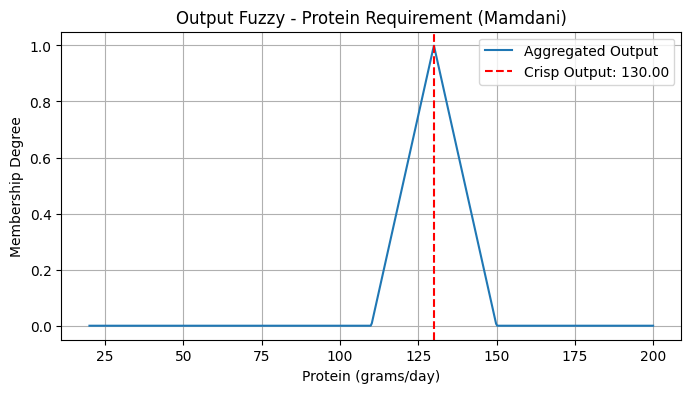

In [120]:
bmi_test = 23
bf_test = 18  # Wanita

output, x_range, agg = mamdani_inference(bmi_test, bf_test)
print(f"Kebutuhan protein berdasarkan Mamdani: {output:.2f} gram/hari")

# Plot hasil fuzzy output
plt.figure(figsize=(8, 4))
plt.plot(x_range, agg, label='Aggregated Output')
plt.axvline(output, color='red', linestyle='--', label=f'Crisp Output: {output:.2f}')
plt.title('Output Fuzzy - Protein Requirement (Mamdani)')
plt.xlabel('Protein (grams/day)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()